<a href="https://colab.research.google.com/github/OzgurCoskunn/tezz/blob/main/finduk_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import glob
import cv2
import warnings
warnings.filterwarnings('ignore')
import os
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.preprocessing.image import load_img

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
""""
from PIL import Image
import glob

image_list = []
resized_images = []

for filename in glob.glob('C:/Users/ozgur/OneDrive/Masaüstü/dataset/hasta//*.JPEG'):
    print(filename)
    img = Image.open(filename)
    image_list.append(img)

for image in image_list:
    image = image.resize((224, 224))
    resized_images.append(image)

for (i, new) in enumerate(resized_images):
    new.save('{}{}{}'.format('C:/Users/ozgur/OneDrive/Masaüstü/dataset/hasta_1//', i+500, '.JPEG'))
    """

'"\nfrom PIL import Image\nimport glob\n\nimage_list = []\nresized_images = []\n\nfor filename in glob.glob(\'C:/Users/ozgur/OneDrive/Masaüstü/dataset/hasta//*.JPEG\'):\n    print(filename)\n    img = Image.open(filename)\n    image_list.append(img)\n\nfor image in image_list:\n    image = image.resize((224, 224))\n    resized_images.append(image)\n\nfor (i, new) in enumerate(resized_images):\n    new.save(\'{}{}{}\'.format(\'C:/Users/ozgur/OneDrive/Masaüstü/dataset/hasta_1//\', i+500, \'.JPEG\'))\n    '

In [ ]:
train_path = "C:/Users/ozgur/OneDrive/Masaüstü/dataset/TRAİN"
test_path = "C:/Users/ozgur/OneDrive/Masaüstü/dataset/TEST"

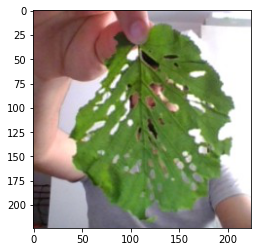

In [ ]:
img=load_img("C:/Users/ozgur/OneDrive/Masaüstü/dataset/TRAİN/YENİ_HASTA/174.jpg")
plt.imshow(img),
plt.show()

In [ ]:
x=img_to_array(img)
print(x.shape)

(224, 224, 3)


In [ ]:
#%% CNN Model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

batch_size = 4

In [ ]:
#%% Data Generation - Train - Test
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,vertical_flip=True)

test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")


Found 540 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
135/135 [==============================] - 76s 555ms/step - loss: 1.2733 - accuracy: 0.6556 - val_loss: 0.1974 - val_accuracy: 1.0000
Epoch 2/10
135/135 [==============================] - 76s 560ms/step - loss: 0.3926 - accuracy: 0.8759 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 3/10
135/135 [==============================] - 79s 582ms/step - loss: 0.1817 - accuracy: 0.9426 - val_loss: 6.1587e-04 - val_accuracy: 1.0000
Epoch 4/10
135/135 [==============================] - 77s 571ms/step - loss: 0.2992 - accuracy: 0.9519 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 5/10
135/135 [==============================] - 75s 558ms/step - loss: 0.3747 - accuracy: 0.9611 - val_loss: 2.2235e-05 - val_accuracy: 1.0000
Epoch 6/10
135/135 [==============================] - 76s 565ms/step - loss: 0.2926 - accuracy: 0.9833 - val_loss: 3.1789e-08 - val_accuracy: 1.0000
Epoch 7/10
135/135 [==============================] - 75s 558ms/step - loss: 0.1188 - accuracy: 0.9704 - val_loss: 1.2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


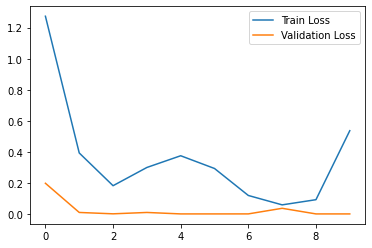

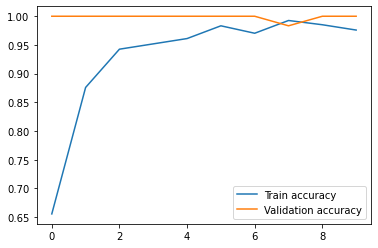

In [ ]:
#%% model evaluation
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "Train accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()


In [ ]:
model.save("finduk_detector5.h6",save_format="h5")

In [ ]:
img = cv2.imread('52.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])


predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)

print (classes_x)

[1]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
